In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

from tensorflow import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers




In [2]:
#dataset = keras.preprocessing.image_dataset_from_directory(
  #'C:\\Users\\jeffe\\Documents\\Projects\\trafic\\archive\\Train', batch_size=64, image_size=(200, 200))

#carregar pil

In [3]:
#dataset

In [53]:



image_size = (48, 48)
batch_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\jeffe\\Documents\\Projects\\trafic\\archive\\Train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\jeffe\\Documents\\Projects\\trafic\\archive\\Train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


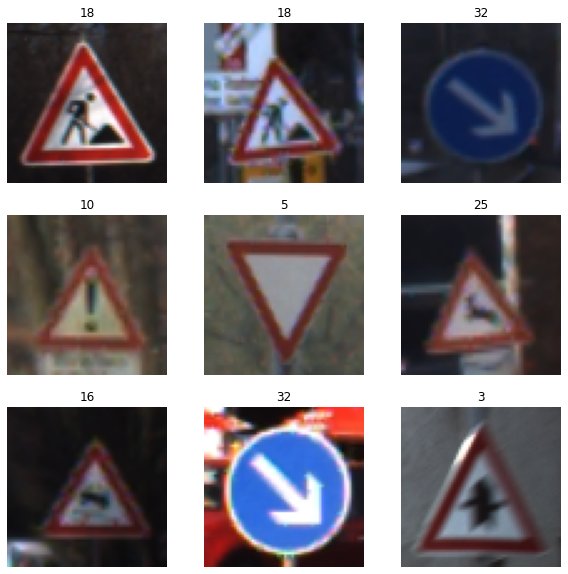

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
#train_ds = train_ds.prefetch(buffer_size=32)
#val_ds = val_ds.prefetch(buffer_size=32)

In [54]:
model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape = (48, 48,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [55]:






opt = keras.optimizers.Adam(learning_rate = 0.01)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('Softmax'))

model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 60, 60, 16)        1216      
                                                                 
 activation_20 (Activation)  (None, 60, 60, 16)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 16)        6416      
                                                                 
 activation_21 (Activation)  (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                 

In [56]:

epochs = 200

history = model.fit(
    train_ds,steps_per_epoch=25, epochs=epochs, validation_data=val_ds,batch_size=128
)


Epoch 1/200
25/25 [==============================] - 3s 124ms/step - loss: 9.5620 - accuracy: 0.0469 - val_loss: 3.6296 - val_accuracy: 0.0574
Epoch 2/200
25/25 [==============================] - 3s 127ms/step - loss: 3.5438 - accuracy: 0.0538 - val_loss: 3.5038 - val_accuracy: 0.0564
Epoch 3/200
25/25 [==============================] - 3s 137ms/step - loss: 3.5173 - accuracy: 0.0575 - val_loss: 3.4889 - val_accuracy: 0.0564
Epoch 4/200
25/25 [==============================] - 3s 121ms/step - loss: 3.5037 - accuracy: 0.0525 - val_loss: 3.4865 - val_accuracy: 0.0564
Epoch 5/200
25/25 [==============================] - 3s 120ms/step - loss: 3.5450 - accuracy: 0.0550 - val_loss: 3.4906 - val_accuracy: 0.0564
Epoch 6/200
25/25 [==============================] - 3s 120ms/step - loss: 3.5090 - accuracy: 0.0569 - val_loss: 3.4881 - val_accuracy: 0.0564
Epoch 7/200
25/25 [==============================] - 3s 121ms/step - loss: 3.5168 - accuracy: 0.0469 - val_loss: 3.4869 - val_accuracy: 0.0573

AttributeError: 'History' object has no attribute 'score'